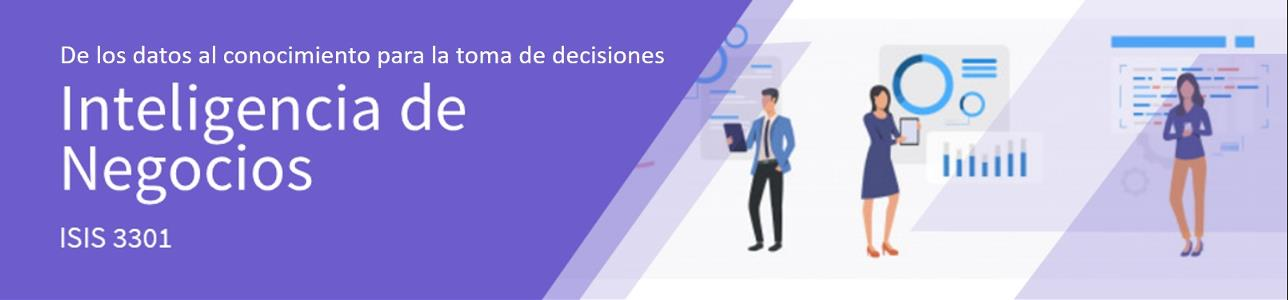

# **Proyecto 1 - Etapa 1**

## Repositorio de Github
[Proyecto1BIG5](https://github.com/pukinidev/Proyecto1BIG5)



## Documento del proyecto
[Documento Proyecto 1 - Etapa 1](https://uniandes-my.sharepoint.com/:w:/g/personal/v_caro_uniandes_edu_co/EUtHSOetKX9NhFBfxW7N4agBWhKqHj7k2UpK9TDqYsZCyQ?e=a5kEqc)

## Integrantes
*   Mariana Ruiz Giraldo - 202011140
*   David Alejandro Fuquen Florez -  202021113
*   Valeria Caro Ramirez - 202111040




## Objetivos

*   Aplicar la metodología de analítica de textos para la construcción de soluciones de
analítica alineadas con los objetivos de organizaciones en un contexto de aplicación.





#**1. Librerías y Carga de datos**


## 1.1. Instalación de las librerías

In [ ]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install scikit-learn
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
!pip install inflect
!pip install chardet
!pip install langdetect
!pip install spacy
!python -m spacy download es_core_news_sm

     | 17.8 MB 21.4 MB/s 0:00:01
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 27.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 34.0 MB/s eta 0:00:00
  Created wheel for ydata-profiling: filename=ydata_profiling-0.0.dev0-py2.py3-none-any.whl size=356222 sha256=9e54b908416d0576874825e292c2b380bd7c93e6377a230f282783bf1d0ca2d4
  Stored in directory: /tmp/pip-ephem-wheel-cache-rkg3pvz1/wheels/07/29/61/f533cc7cbd0a97efb2d1b94d3254a3e859a949367ba842577b
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=41b47553f11d9a9abe6f8e36fd6073cb0840466114a8e43d8d38ac0855f0b7b4
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Succe

## 1.2. Imports necesarios para el funcionamiento del notebook

In [ ]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns

# Text processing and NLP
import nltk
import spacy
import unicodedata
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, SnowballStemmer

# Machine learning and feature extraction
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, RandomizedSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score

# Pipeline
from sklearn.pipeline import Pipeline
from joblib import dump, load

# Profiling and display
import ydata_profiling
from pandas_profiling import ProfileReport
from IPython.display import display, HTML

# Collections
from collections import Counter

<ipython-input-2-54a8ccb92f11>:34: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [ ]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

## 1.3. Obtener los datos

In [ ]:
# Datos para entrenar el modelo

data_model  = 'https://github.com/pukinidev/Proyecto1BIG5/blob/main/Etapa%201/data/ODScat_345.xlsx?raw=true'

# Datos a entregar etiquetados

data_for_labeling = 'https://github.com/pukinidev/Proyecto1BIG5/blob/main/Etapa%201/data/TestODScat_345.xlsx?raw=true'

## 1.4. Lectura de los datos

In [ ]:
data_original = pd.read_excel(data_model)
data = data_original.copy()
data.sample(10)

Textos_espanol  sdg
879   Después de una breve descripción de las enferm...    3
465   En total, en 2016, se notificaron 30 273 casos...    3
2357  Los indicadores agregados que se centran en el...    5
1503  Tras la reforma de la Folkeskole de 2014 y la ...    4
564   En los Países Bajos, PHI también cubre fisiote...    3
1649  Los criterios y métodos de evaluación los defi...    4
3627  Los itinerarios de educación vocacional de alt...    4
3222  Un piloto de este programa en 2010 apoyó nueve...    4
1987  Muchas escuelas secundarias son bilingües, con...    4
2349  Un análisis de género permite a los donantes a...    5

# **2. Entendimiento de los Datos**





Se realiza el perfilamiento de los datos con ydata_profiling. Aquí se evidencian algunas características de los datos que deben ser corregidas con el fin de aplicar los algoritmos de clasificación. Además, se realizará la transformación de los textos a un vector numérico para poder aplicar los algoritmos.

## 2.1. Dimensión de los datos

Los datos estan compuestos por 4049 registros y 2 columnas

In [ ]:
data.shape

(4049, 2)

## 2.2. Perfilamiento

Se identificaron dos tipos de columnas: una categorica numérica y otra de texto.

- numérica: "sdg"
- texto: "Textos_espanol"

En este proyecto, la variable objetivo corresponde al sdg. El "sdg" es la categoria de ODS a la que corresponde cada uno de los registros de la columna de "Textos_espanol". Los ODS identificados en los registros corresponden a el 3,4,5

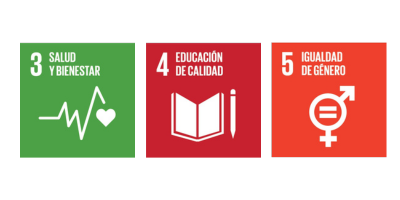



*   El ods 3 corresponde a la salud y bienestar
*   El ods 4 corresponde a la educación de calidad
*   El ods 5 corresponde a la igualdad de género






In [ ]:
display(data.info())
display(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4049 entries, 0 to 4048
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Textos_espanol  4049 non-null   object
 1   sdg             4049 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 63.4+ KB


None

sdg
count  4049.000000
mean      4.051124
std       0.814338
min       3.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       5.000000

In [ ]:
textos = data.copy()
textos['Conteo'] = [len(x) for x in textos['Textos_espanol']]
textos['Moda'] = [Counter(x.split(" ")).most_common(1)[0][0] for x in textos['Textos_espanol']]
textos['Max'] = [[max([len(x) for x in i.split(' ')])][0] for i in textos['Textos_espanol']]
textos['Min'] = [[min([len(x) for x in i.split(' ')])][0] for i in textos['Textos_espanol']]

In [ ]:
textos

Textos_espanol  sdg  Conteo Moda  \
0     Por ejemplo, el nÃºmero de consultas externas ...    3     944   de   
1     En 2007, el gobierno central financió directam...    3     476  del   
2     Claramente, hay muchos otros factores en juego...    3    1207   de   
3     Por ejemplo, el estado australiano de Victoria...    3    1090   de   
4     El consumo anual de alcohol se estima en 15,7 ...    3     895   de   
...                                                 ...  ...     ...  ...   
4044  Para ello, identificará las cuestiones de géne...    5     822   de   
4045  La participación de las mujeres en roles de li...    5     514   de   
4046  Según el WEF, según las tendencias de 2016, po...    5     445   el   
4047  Sirve como recurso y foro para las agencias, c...    5    1017   de   
4048  Las áreas útiles para un mayor estudio y acció...    5     728   de   

      Max  Min  
0      18    1  
1      14    1  
2      15    1  
3      17    1  
4      13    1  
...   ...  ...  
4044   16    1  
4045   16    1  
4046   17    1  
4047   15    1  
4048   15    1  

[4049 rows x 6 columns]

 ## 2.3. Análisis y calidad de los datos

###2.3.1 Exploración de los datos con ydata-profiling

In [ ]:
ProfileReport = ydata_profiling.ProfileReport(data)
ProfileReport

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

 ### 2.3.2 Completitud

 No se encontraron valores ausentes en ningún registro

### 2.3.3 Unicidad

No se encontraron duplicados, asegurando que cada registro es único

### 2.3.4 Consistencia

Los datos de texto están almacenados como cadenas de caracteres y los datos categóricos como datos numéricos y los datos que representan el mismo concepto tienen la misma representación.


### 2.3.5 Validez

Todos los valores de la columna "Textos_espanol" son datos de tipo texto y que los valores de "sdg" corresponden exclusivamente a los ODS {3, 4, 5}.

## 2.4. Separación de datos en entrenamiento (train), validación (validation) y evaluación (test)

Primero se dividen los datos en los tres sets.

In [ ]:
Y = data['sdg']
X = data.drop(['sdg'], axis=1)


X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)


# Modelo - Logistic Regression
X_train_m1, X_test_m1, Y_train_m1, Y_test_m1 = X_train.copy(), X_test.copy(), Y_train.copy(), Y_test.copy()

# Modelo - KNN
X_train_m2, X_test_m2, Y_train_m2, Y_test_m2 = X_train.copy(), X_test.copy(), Y_train.copy(), Y_test.copy()

# Modelo - Bayes
X_train_m3, X_test_m3, Y_train_m3, Y_test_m3 = X_train.copy(), X_test.copy(), Y_train.copy(), Y_test.copy()

In [ ]:
X_train.shape, X_test.shape

((3239, 1), (810, 1))

In [ ]:
Y_train.shape,  Y_test.shape

((3239,), (810,))

Se utiliza la librería de ydata-profiling para realizar la exploración de los datos.

## 2.6. WordCloud de los textos

Realizamos un WordCloud, el cual nos permitirá analizar las palabras más frecuentes en registros pertenecientes a un clase en específico.

In [ ]:
def mostrar_grafico(palabras,stopwords=[]):
    comment_words = ''

    for val in palabras:
        val = str(val)
        tokens = val.split()
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()
        comment_words += " ".join(tokens)+" "

    wordcloud = WordCloud(width = 800, height = 800,
                    background_color ='white',
                    stopwords = stopwords,
                    min_font_size = 10).generate(comment_words)


    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)

    plt.show()

------------ SDG: 5 ------------


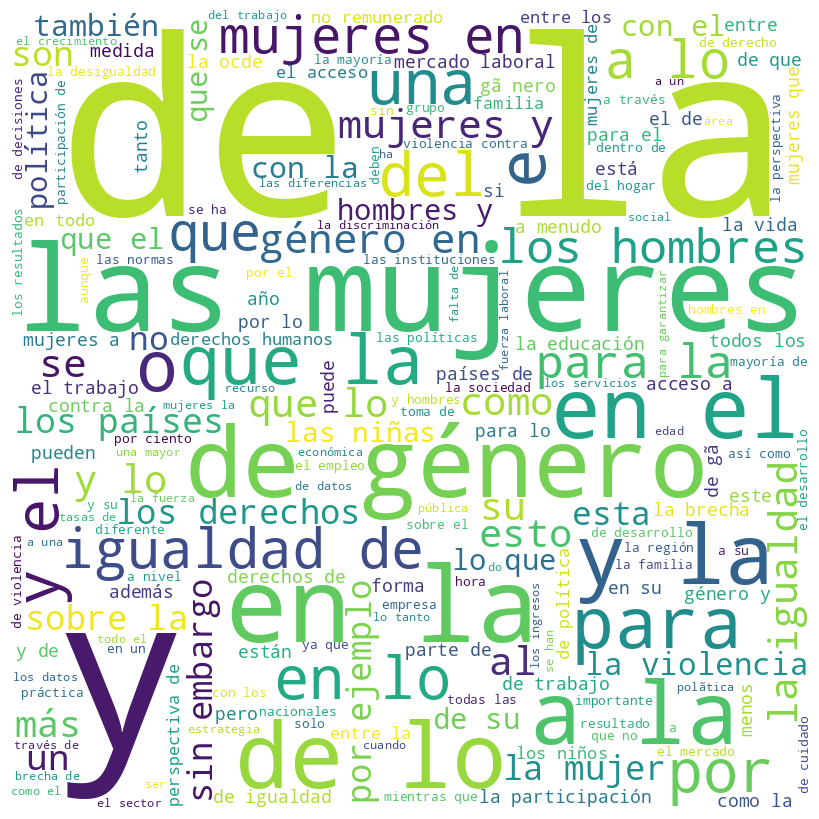

------------ SDG: 4 ------------


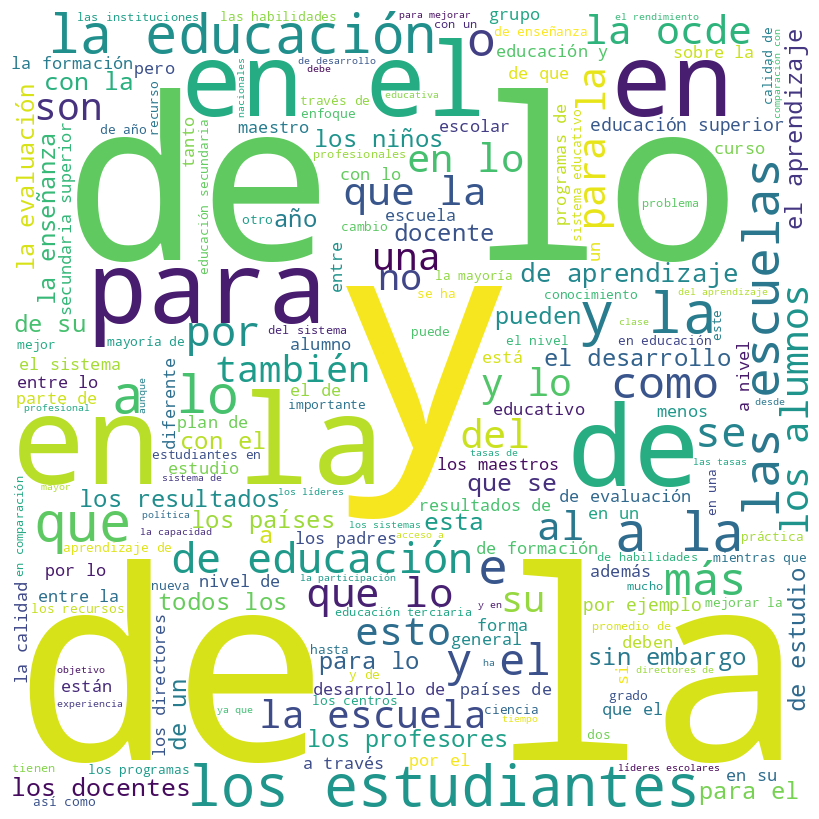

------------ SDG: 3 ------------


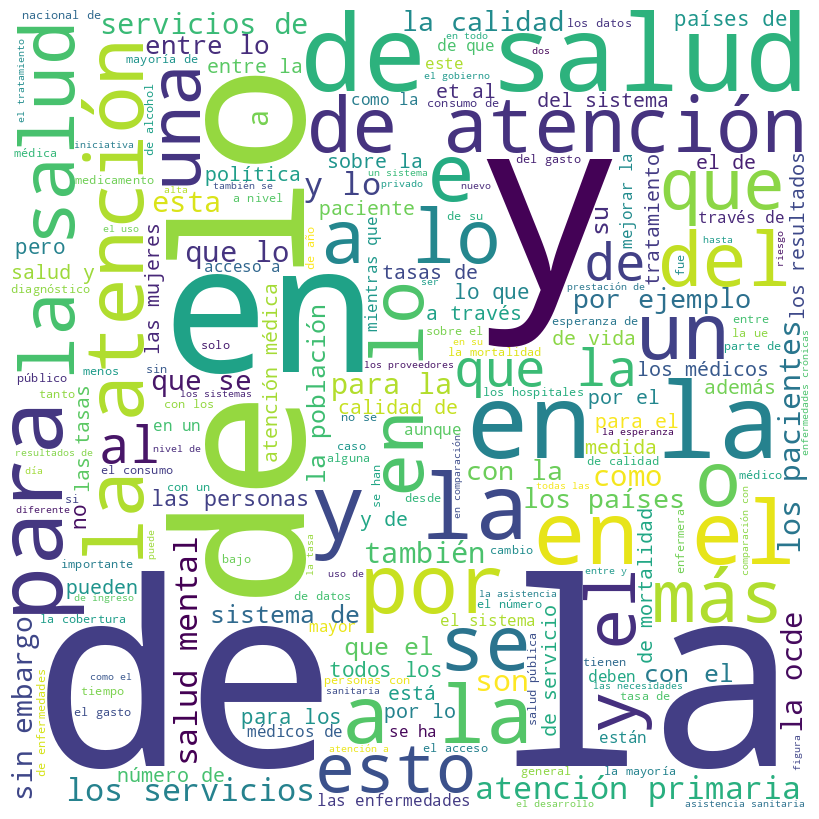

In [ ]:
stop_words = stopwords.words('spanish')
for i in Y_train.unique():
    print(f'------------ SDG: {i} ------------')
    index = Y_train[Y_train == i].index
    words_i = X_train.loc[index]
    mostrar_grafico(words_i['Textos_espanol'])

Para cada clase hay varias palabras frecuentes que no aportan mucha información. Estas palabras, llamadas `stopwords`. Utilizamos la lista de `stopwords`en español para removerlas.

------------ SDG: 5 ------------


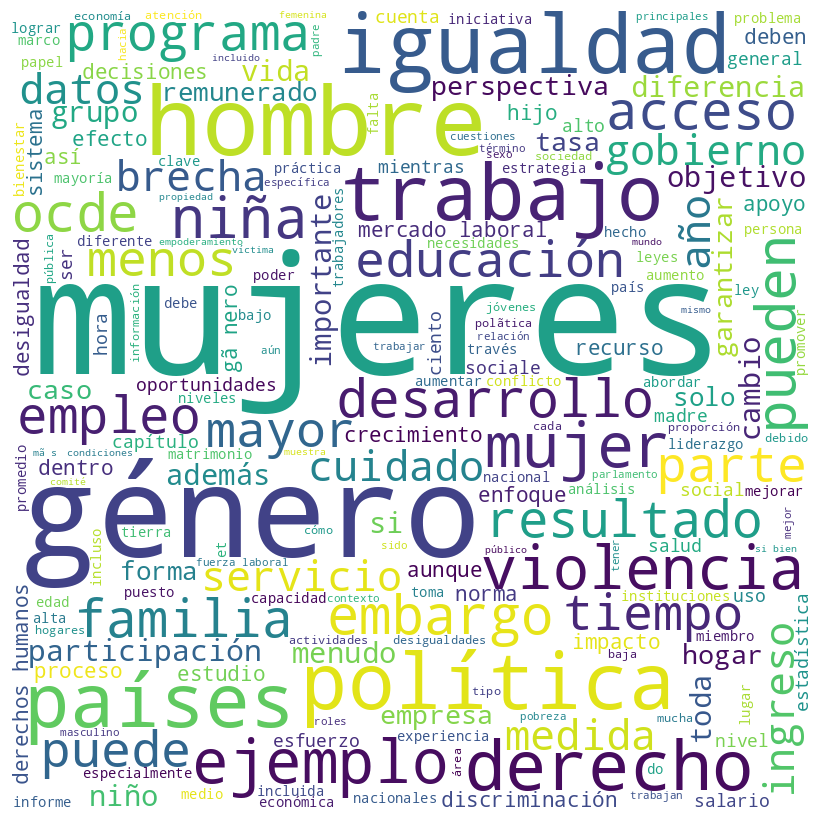

------------ SDG: 4 ------------


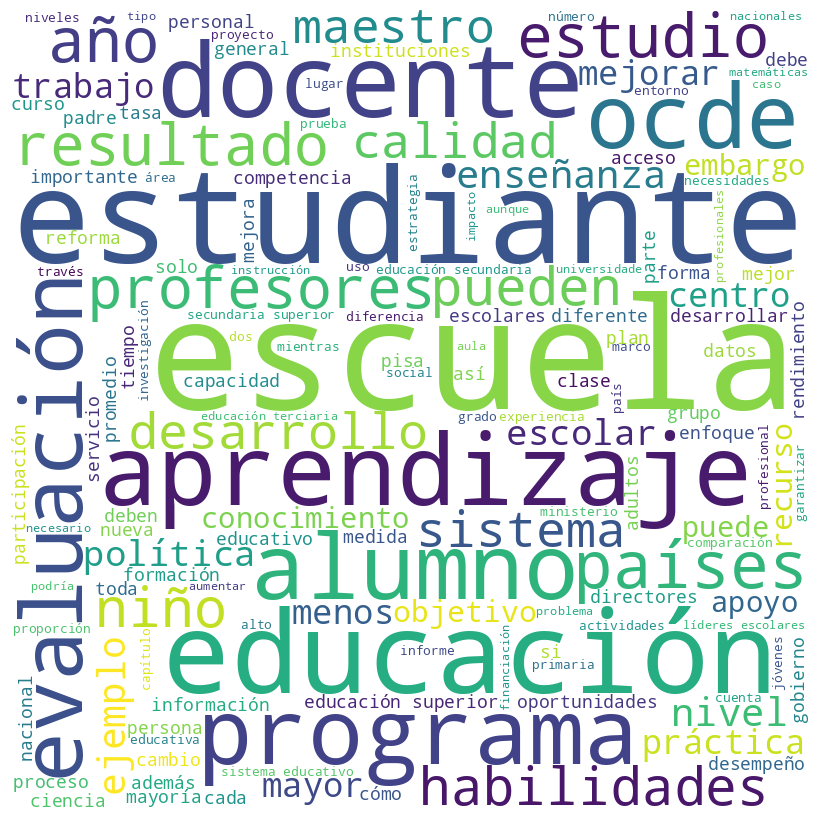

------------ SDG: 3 ------------


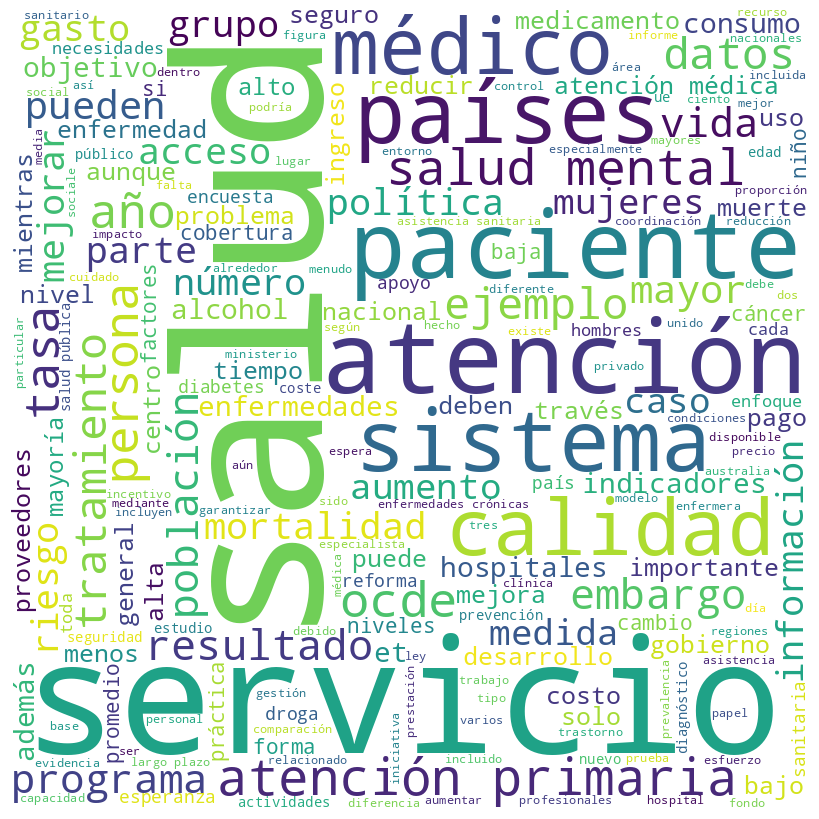

In [ ]:
for i in Y_train.unique():
    print(f'------------ SDG: {i} ------------')
    index = Y_train[Y_train == i].index
    words_i = X_train.loc[index]
    mostrar_grafico(words_i['Textos_espanol'],stop_words)

#**3. Preprocesamiento de los datos**
Para llevar a cabo el preprocesamiento de los datos, se procede con la eliminación de ruido y la tokenización.



In [ ]:
class Preprocesamiento(BaseEstimator, TransformerMixin):

      def fit(self, X, y=None):
          return self

      def remove_non_ascii(self,words):
          """Remove non-ASCII characters from list of tokenized words"""
          new_words = []
          for word in words:
              new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
              new_words.append(new_word)
          return new_words

      def to_lowercase(self,words):
          """Convert all characters to lowercase from list of tokenized words"""
          new_words = []
          for word in words:
              new_word = word.lower()
              new_words.append(new_word)
          return new_words

      def remove_punctuation_and_numbers(self,words):
          """Remove punctuation and numbers from list of tokenized words, accounting for Spanish characters."""
          # This pattern removes punctuation and digits
          pattern = r'[!"#\$%&\'\(\)\*\+,\-\.\/:;<=>\?@\[\\\]\^_`\{\|\}~¿¡0-9]'
          new_words = []
          for word in words:
              # Remove punctuation and numbers using the updated pattern
              new_word = re.sub(pattern, '', word)
              if new_word != '':
                  new_words.append(new_word)
          return new_words


      def remove_stopwords(self,words, stopwords=stopwords.words('spanish')):
          """Remove stop words from list of tokenized words"""
          new_words = []
          for word in words:
              if word not in stopwords:
                  new_words.append(word)
          return new_words

      def remove_numbers(self,words):
          """Remove all interger occurrences in list of tokenized words"""
          new_words = []
          for word in words:
              palabra = ''
              for char in word:
                  if not char.isdigit():
                      palabra = palabra + char
              if palabra != '':
                  new_words.append(palabra)
          return new_words



      def preprocessing(self, words):
          words = self.to_lowercase(words)
          words = self.remove_non_ascii(words)
          words = self.remove_numbers(words)
          words = self.remove_punctuation_and_numbers(words)
          words = self.remove_stopwords(words)
          return words

      def transform(self, X):
          X['Textos_espanol'] = X['Textos_espanol'].apply(word_tokenize)
          X['Textos_espanol'] = X['Textos_espanol'].apply(self.preprocessing)
          return X['Textos_espanol']


## 3.1. Normalización de los textos

Para la normalización de los textos se utilizo la tecnica de "stemming"

In [ ]:
stemmer = SnowballStemmer('spanish')

In [ ]:
class Normalizacion(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None):
        return self

    def stem_words(self, words):
        return [stemmer.stem(word) for word in words]

    def transform(self, X):
        X = X.apply(self.stem_words)
        X = X.apply(lambda x: ' '.join(x))
        return X


##3.2.Creación del pipeline para el procesamiento de los datos

La creación del pipeline integra tanto la etapa de vectorización como los modelos de clasificación seleccionados. En la fase de vectorización, se ha empleado el TfidfVectorizer con el propósito de transformar el texto en características numéricas. Estas características numéricas se utilizarán posteriormente en cada uno de los modelos de clasificación para evaluar su rendimiento.

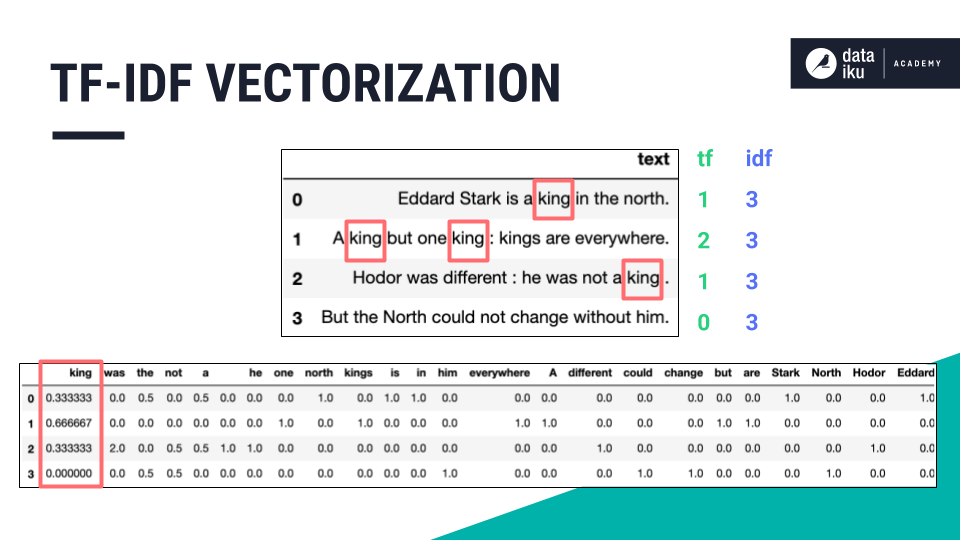

### 3.2.1. Creación del pipeline (General)

In [ ]:
# Este pipeline queda con el mejor modelo.
# Vectorizer
vect = TfidfVectorizer()

"""
  Models Intances
"""

# Logistic Regression
logr = LogisticRegression()
# KNN
knn = KNeighborsClassifier()
# Bayes
bys = MultinomialNB()


pipeline = Pipeline([
    ('preprocesamiento', Preprocesamiento()),
    ('normalizacion', Normalizacion()),
    ('vectorizacion', vect),
    ('modelo', bys)
])

###3.2.1. Pipeline para el modelo 1

In [ ]:
vect_m1 = TfidfVectorizer()

logr_m1 = LogisticRegression()

pipeline_m1 = Pipeline([
    ('preprocesamiento', Preprocesamiento()),
    ('normalizacion', Normalizacion()),
    ('vectorizacion', vect_m1),
    ('modelo', logr_m1)
])

###3.2.1. Pipeline para el modelo 2

In [ ]:
vect_m2 = TfidfVectorizer()

knn_m2 = KNeighborsClassifier()

pipeline_m2 = Pipeline([
    ('preprocesamiento', Preprocesamiento()),
    ('normalizacion', Normalizacion()),
    ('vectorizacion', vect_m2),
    ('modelo', knn_m2)
])

###3.2.1. Pipeline para el modelo 3

In [ ]:
vect_m3 = TfidfVectorizer()

bys_m3 = MultinomialNB()

pipeline_m3 = Pipeline([
    ('preprocesamiento', Preprocesamiento()),
    ('normalizacion', Normalizacion()),
    ('vectorizacion', vect_m3),
    ('modelo', bys_m3)
])

### 3.2.2. Visualización del pipeline (General)



In [ ]:
pipeline

Pipeline(steps=[('preprocesamiento', Preprocesamiento()),
                ('normalizacion', Normalizacion()),
                ('vectorizacion', TfidfVectorizer()),
                ('modelo', MultinomialNB())])

#4. Algoritmos de Clasificación

##4.1. Modelo Logistic Regression


Para definir el valor del hiperparámetro "c", usaremos una validación cruzada de k-particiones


### 4.1.1. Modelo

In [ ]:
particiones = KFold(n_splits=10, shuffle=True, random_state = 0)

param_grid_m1 = {"modelo__C": [0.01, 0.1, 1, 5] }

grid_search_m1 = GridSearchCV(pipeline_m1, param_grid_m1, cv=particiones, scoring='accuracy')

grid_search_m1 = grid_search_m1.fit(X_train_m1 , Y_train_m1)


### 4.1.2. Mejor modelo

In [ ]:
mejor_model_m1 = grid_search_m1.best_estimator_

### 4.1.3. Mejores parametros

In [ ]:
grid_search_m1.best_params_

{'modelo__C': 5}

### 4.1.4. Predicción sobre la partición de test

In [ ]:
y_pred_test_m1 = mejor_model_m1.predict(X_test_m1)

### 4.1.5. Resultados obtenidos

In [ ]:
f1_logistic = f1_score(Y_test_m1, y_pred_test_m1, average='macro')  # 'macro' calcula la puntuación F1 promedio
print(f'Puntuación F1 (Macro): {f1_logistic:.10f}')

Puntuación F1 (Macro): 0.9793250384


In [ ]:
print(classification_report(Y_test_m1, y_pred_test_m1))

              precision    recall  f1-score   support

           3       0.99      0.99      0.99       250
           4       0.96      0.98      0.97       268
           5       0.98      0.97      0.98       292

    accuracy                           0.98       810
   macro avg       0.98      0.98      0.98       810
weighted avg       0.98      0.98      0.98       810



In [ ]:
grid_search_m1.best_score_

0.9752962198524635

In [ ]:
print('Exactitud: %.8f' % accuracy_score(Y_test_m1, y_pred_test_m1))
print('Precisión: %.8f' % precision_score(Y_test_m1, y_pred_test_m1, average='macro'))
print('Recall: %.8f' % recall_score(Y_test_m1, y_pred_test_m1, average='macro'))
print('F1: %.8f' % f1_score(Y_test_m1, y_pred_test_m1, average='macro'))

Exactitud: 0.97901235
Precisión: 0.97930071
Recall: 0.97940489
F1: 0.97932504


### 4.1.6. Matriz de confusión

In [ ]:
conf_matrix_m1 = confusion_matrix(Y_test_m1, y_pred_test_m1)

Text(0.5, 23.52222222222222, 'Predicted Labels')

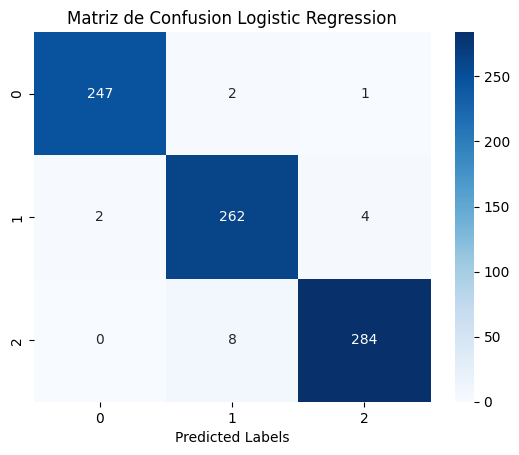

In [ ]:
sns.heatmap(conf_matrix_m1, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusion Logistic Regression')
plt.xlabel('Predicted Labels')

## 4.2. Modelo KNeighbors

Para el algoritmo KNeighbors, se utilizaron parámetros como el número de vecinos a considerar `(n_neighbors)`, el tipo de ponderación de los vecinos `(weights)` y la métrica de distancia `(metric)`. Se probaron diferentes configuraciones para identificar cuál de ellas ofrecía el mejor rendimiento del modelo.

A continuación se describen los parametros utilizados para el modelo:


| Parámetro            | Valores Posibles                           | Descripción                                                                            |
|----------------------|--------------------------------------------|----------------------------------------------------------------------------------------|
| `modelo__n_neighbors`| 3, 5, 7                                    | Número de vecinos a considerar para la clasificación.                                  |
| `modelo__weights`    | 'uniform', 'distance'                      | Método de ponderación de los vecinos: 'uniform' para pesos iguales y 'distance' para pesos basados en la distancia. |
| `modelo__metric`     | 'minkowski', 'euclidean', 'manhattan'      | Métrica para calcular la distancia entre puntos: 'minkowski', 'euclidean' o 'manhattan'. |





### 4.2.1. Modelo

In [ ]:
particiones = KFold(n_splits=10, shuffle=True, random_state = 0)

grid_params_m2 = { 'modelo__n_neighbors' : [3,5,7],
               'modelo__weights' : ['uniform','distance'],
               'modelo__metric' : ['minkowski','euclidean','manhattan']}


grid_search_m2 = GridSearchCV(pipeline_m2, grid_params_m2, verbose=1, cv=particiones, n_jobs = -1)

grid_search_m2 = grid_search_m2.fit(X_train_m2 , Y_train_m2)

print(grid_search_m2.best_params_)

Fitting 10 folds for each of 18 candidates, totalling 180 fits
{'modelo__metric': 'minkowski', 'modelo__n_neighbors': 7, 'modelo__weights': 'distance'}


### 4.2.2. Mejor modelo

In [ ]:
mejor_modelo_m2 = grid_search_m2.best_estimator_

### 4.2.3. Predicción sobre la partición de test

In [ ]:
y_pred_test_m2 = mejor_modelo_m2.predict(X_test_m2)

### 4.2.4. Resultados obtenidos

In [ ]:
print(classification_report(Y_test_m2, y_pred_test_m2))

              precision    recall  f1-score   support

           3       1.00      0.94      0.97       250
           4       0.94      0.98      0.96       268
           5       0.96      0.96      0.96       292

    accuracy                           0.96       810
   macro avg       0.96      0.96      0.96       810
weighted avg       0.96      0.96      0.96       810



In [ ]:
print('Exactitud: %.8f' % accuracy_score(Y_test_m2, y_pred_test_m2))
print('Precisión: %.8f' % precision_score(Y_test_m2, y_pred_test_m2, average='macro'))
print('Recall: %.8f' % recall_score(Y_test_m2, y_pred_test_m2, average='macro'))
print('F1: %.8f' % f1_score(Y_test_m2, y_pred_test_m2, average='macro'))
f1_knn = f1_score(Y_test_m2, y_pred_test_m2, average='macro')  # 'macro' calcula la puntuación F1 promedio
print(f'Puntuación F1 (Macro): {f1_knn:.10f}')

Exactitud: 0.96296296
Precisión: 0.96473841
Recall: 0.96255735
F1: 0.96328411
Puntuación F1 (Macro): 0.9632841075


### 4.2.5. Matriz de confusión

In [ ]:
conf_matrix_m2 = confusion_matrix(Y_test_m2, y_pred_test_m2)

Text(0.5, 23.52222222222222, 'Predicted Labels')

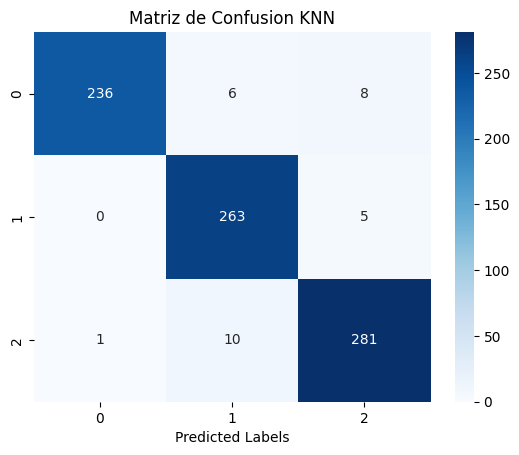

In [ ]:
sns.heatmap(conf_matrix_m2, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusion KNN')
plt.xlabel('Predicted Labels')

## 4.3. Modelo Naive Bayes Multinomial

### 4.3.1. Modelo

In [ ]:
particiones = KFold(n_splits=10, shuffle=True, random_state = 0)

grid_params_m3 = { 'modelo__alpha' : [0.1, 0.5, 1.5, 2.0, 2.5, 3, 3.5]}

grid_search_m3 = GridSearchCV(pipeline_m3, grid_params_m3, verbose=1, cv=particiones, n_jobs = -1)

grid_search_m3 = grid_search_m3.fit(X_train_m3 , Y_train_m3)

print(grid_search_m3.best_params_)

Fitting 10 folds for each of 7 candidates, totalling 70 fits
{'modelo__alpha': 0.5}


### 4.3.2. Mejor modelo

In [ ]:
mejor_model_m3 = grid_search_m3.best_estimator_

### 4.3.3. Predicción sobre la partición de test

In [ ]:
y_pred_test_m3 = mejor_model_m3.predict(X_test)

### 4.3.4. Resultados obtenidos

In [ ]:
grid_search_m3.best_score_

0.9638831556014218

In [ ]:
f1_bayes = f1_score(Y_test_m3, y_pred_test_m3, average='macro')  # 'macro' calcula la puntuación F1 promedio
print(f'Puntuación F1 (Macro): {f1_bayes:.10f}')

Puntuación F1 (Macro): 0.9669321387


In [ ]:
print(classification_report(Y_test_m3, y_pred_test_m3))


              precision    recall  f1-score   support

           3       0.99      0.96      0.97       250
           4       0.96      0.97      0.97       268
           5       0.96      0.97      0.96       292

    accuracy                           0.97       810
   macro avg       0.97      0.97      0.97       810
weighted avg       0.97      0.97      0.97       810



In [ ]:
print('Exactitud: %.8f' % accuracy_score(Y_test_m3, y_pred_test_m3))
print('Precisión: %.8f' % precision_score(Y_test_m3, y_pred_test_m3, average='macro'))
print('Recall: %.8f' % recall_score(Y_test_m3, y_pred_test_m3, average='macro'))
print('F1: %.8f' % f1_score(Y_test_m3, y_pred_test_m3, average='macro'))

Exactitud: 0.96666667
Precisión: 0.96774774
Recall: 0.96635289
F1: 0.96693214


### 4.3.5. Matriz de confusión

Text(0.5, 23.52222222222222, 'Predicted Labels')

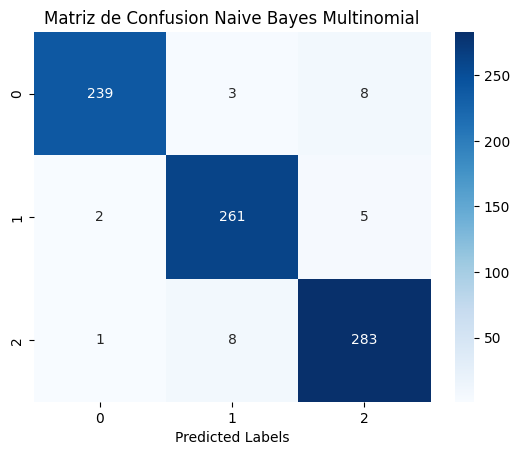

In [ ]:
conf_matrix_m3 = confusion_matrix(Y_test_m3, y_pred_test_m3)
sns.heatmap(conf_matrix_m3, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusion Naive Bayes Multinomial')
plt.xlabel('Predicted Labels')

In [ ]:
mejor_modelo = mejor_model_m1

##5. Exportar Pipeline

In [ ]:
data_final = pd.read_excel(data_for_labeling)

X = data_final.copy()

In [ ]:
from joblib import dump, load

In [ ]:
filename = 'model.joblib'
dump(mejor_modelo, filename)

['model.joblib']

In [ ]:
new_pipe = load('model.joblib')
sdg = new_pipe.predict(X)
data_final['sdg'] = sdg

In [ ]:
data_final.sample(5)

Textos_espanol  sdg
71   Dada la evidencia de que muchos estudiantes en...    4
692  El apoyo político y práctico para garantizar q...    5
457  Desde la aprobación de la Convención, no se ha...    5
4    1999|H5|, Ares Abalde, 2014[ij]. El pequeño nú...    4
258  Se preguntó a los encuestados sobre las formas...    3

In [ ]:
data_final.to_excel('data_predicted.xlsx', index=False)